### Full Name : Seyed Mohammad Ojagh Kazzazi
### Student Number : 400100554


# Support Vector Machines (SVM)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from scipy.stats import zscore
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report


## Goal
In this assignment, we are going to implement Support Vector Machines (SVM) algorithm that determines which patient is in danger and which is not.

In [2]:
df = pd.read_csv("Liver_Disease.csv") 

### Pre-Processing

#### Exploratory Data Analysis:
In statistics, exploratory data analysis is an approach to analyze datasets to summarize their main characteristics, often using statistical graphics and other data visualization methods.

This is a general approach that should be applied when you encounter a dataset.

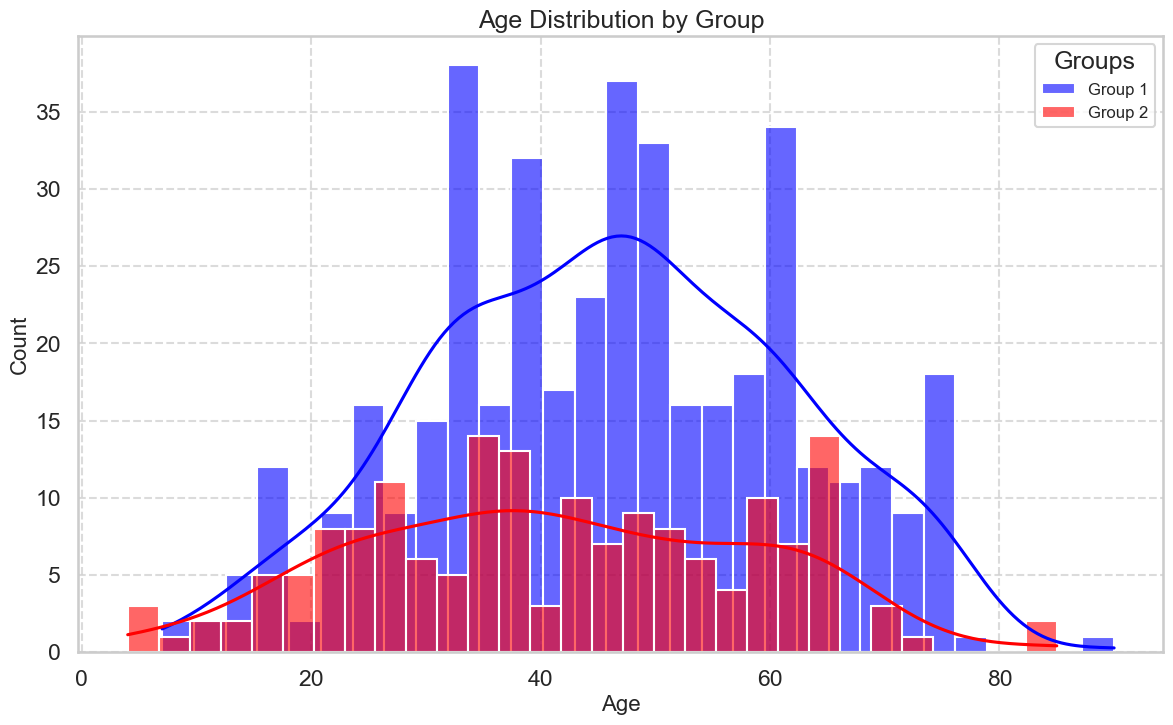

/var/folders/8l/5xcxk9c1563g0bc97fhqvgkr0000gp/T/ipykernel_8929/332556142.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.countplot(x='Gender', data=df[df[target_column] == 1], palette=palette)
/var/folders/8l/5xcxk9c1563g0bc97fhqvgkr0000gp/T/ipykernel_8929/332556142.py:36: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  ax1 = sns.countplot(x='Gender', data=df[df[target_column] == 1], palette=palette)
/var/folders/8l/5xcxk9c1563g0bc97fhqvgkr0000gp/T/ipykernel_8929/332556142.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.countplot(x='Gender', data=df[df[target_column] == 2], palette=palette)
/var/folders/8l/5xcxk9c1563g0bc97fhqvgkr0000g

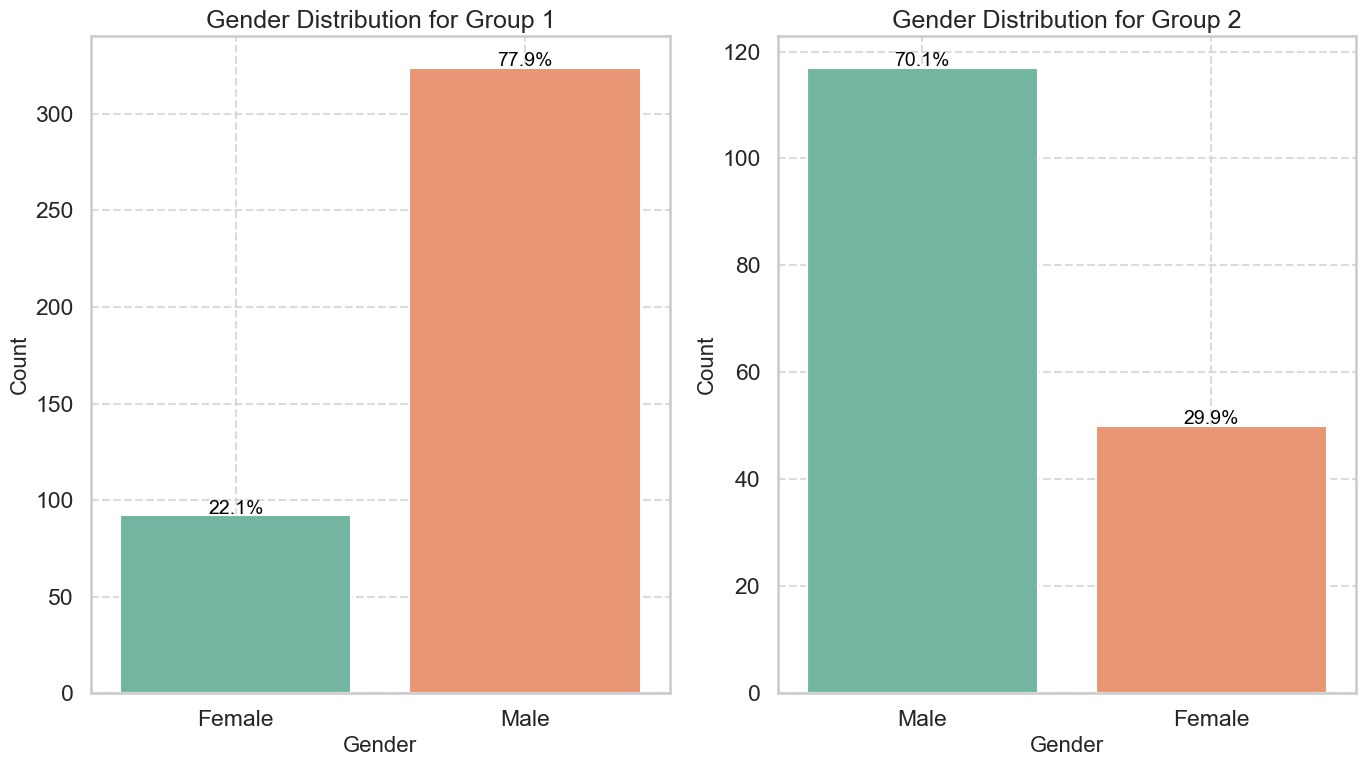

In [4]:
target_column = 'label' 


# Set the style and context for the plots
sns.set(style="whitegrid", context="talk")

# Plot age distribution for both groups
plt.figure(figsize=(14, 8))

# Plot histograms with transparency and improved aesthetics
sns.histplot(df[df[target_column] == 1]['Age'], kde=True, color='blue', label='Group 1', alpha=0.6, bins=30)
sns.histplot(df[df[target_column] == 2]['Age'], kde=True, color='red', label='Group 2', alpha=0.6, bins=30)

# Add legend
plt.legend(title='Groups', fontsize=12)

# Add title and labels with improved font sizes
plt.title('Age Distribution by Group', fontsize=18)
plt.xlabel('Age', fontsize=16)
plt.ylabel('Count', fontsize=16)

# Add grid with improved aesthetics
plt.grid(True, linestyle='--', alpha=0.7)

# Show plot
plt.show()

# Plot gender distribution for both groups
plt.figure(figsize=(14, 8))

# Define a color palette
palette = sns.color_palette("Set2")

# Plot for Group 1
plt.subplot(1, 2, 1)
ax1 = sns.countplot(x='Gender', data=df[df[target_column] == 1], palette=palette)
plt.title('Gender Distribution for Group 1', fontsize=18)
plt.xlabel('Gender', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.grid(True, linestyle='--', alpha=0.7)

# Add percentage labels on the bars with improved aesthetics
for p in ax1.patches:
    height = p.get_height()
    ax1.annotate(f'{height/len(df[df[target_column] == 1])*100:.1f}%', 
                 (p.get_x() + p.get_width() / 2., height), 
                 ha='center', va='center', fontsize=14, color='black', xytext=(0, 5), 
                 textcoords='offset points')

# Plot for Group 2
plt.subplot(1, 2, 2)
ax2 = sns.countplot(x='Gender', data=df[df[target_column] == 2], palette=palette)
plt.title('Gender Distribution for Group 2', fontsize=18)
plt.xlabel('Gender', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.grid(True, linestyle='--', alpha=0.7)

# Add percentage labels on the bars with improved aesthetics
for p in ax2.patches:
    height = p.get_height()
    ax2.annotate(f'{height/len(df[df[target_column] == 2])*100:.1f}%', 
                 (p.get_x() + p.get_width() / 2., height), 
                 ha='center', va='center', fontsize=14, color='black', xytext=(0, 5), 
                 textcoords='offset points')

plt.tight_layout()
plt.show()

##### Question: What do you conclude from the plots?

#### Age Distribution by Group
- **Observation**: The age distribution histograms for both groups (Group 1 and Group 2) show the frequency of ages within each group.
- **Conclusion**: 
  - If the histograms for both groups overlap significantly, it suggests that the age distribution is similar between the two groups.
  - If there is a noticeable difference in the peaks or spread of the histograms, it indicates that the age distribution varies between the groups.

#### Gender Distribution by Group
- **Observation**: The count plots for gender distribution show the number of males and females in each group.
- **Conclusion**:
  - If the gender distribution is similar in both groups, it suggests that gender is evenly distributed across the groups.
  - If there is a significant difference in the gender distribution between the groups, it indicates a potential imbalance in gender representation.

#### Outlier Detection & Removal
Check whether we have outliers in the data. If there are, delete them.

In [24]:

# Assuming df is your DataFrame
# df = pd.read_csv("Liver_Disease.csv") 
def remove_outliers(df):
    # Select numerical columns
    numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
    
    for col in numerical_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 3 * IQR
        upper_bound = Q3 + 3 * IQR
        
        # Remove outliers
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    
    return df

# Apply the function to remove outliers
df_cleaned = remove_outliers(df)

# Display the cleaned DataFrame
print(df_cleaned.describe())

              Age  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
count  418.000000       418.000000        418.000000            418.000000   
mean    44.535885         1.241866          0.457656            221.483254   
std     16.815543         0.871639          0.478257             92.702075   
min      4.000000         0.400000          0.100000             63.000000   
25%     32.000000         0.700000          0.200000            165.250000   
50%     45.000000         0.900000          0.200000            195.000000   
75%     57.000000         1.400000          0.500000            245.000000   
max     90.000000         5.300000          2.300000            614.000000   

       Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
count                418.000000                  418.000000      418.000000   
mean                  34.303828                   40.693780        6.511483   
std                   20.089155                   26.516852 

#### Feature Engineering:
Sometimes the collected data are raw; they are either incompatible with your model or hinders its performance. That’s when feature engineering comes to rescue. It encompasses preprocessing techniques to compile a dataset by extracting features from raw data.
also feel free to do more feature engineering techniques if needed.

In [25]:
def normalize_numerical_features(df):
    # Select numerical columns
    numerical_cols = df.select_dtypes(include=[float, int]).columns
    
    # Initialize the MinMaxScaler
    scaler = MinMaxScaler()
    
    # Normalize numerical features
    df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
    
    return df

def encode_categorical_features(df):
    # Initialize the LabelEncoder
    label_encoder = LabelEncoder()
    
    # Apply label encoding to the 'Gender' column
    if 'Gender' in df.columns:
        df['Gender'] = label_encoder.fit_transform(df['Gender'])
    
    return df

df_clean = normalize_numerical_features(df_cleaned) 
df_clean = encode_categorical_features(df_clean)
    

# Assuming your dataset is loaded into a DataFrame called df_clean
# df_clean = pd.read_csv('your_dataset.csv')

# Print the first few rows of the processed DataFrame
print(df_clean.head())

# Optionally, save the processed DataFrame to a new CSV file
# df_clean.to_csv('processed_dataset.csv', index=False)

        Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0  0.709302       0         0.061224          0.000000              0.225045   
3  0.627907       1         0.122449          0.136364              0.215971   
4  0.790698       1         0.714286          0.863636              0.239564   
5  0.488372       1         0.285714          0.272727              0.263158   
6  0.255814       0         0.102041          0.045455              0.165154   

   Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
0                  0.049587                    0.057971        0.594203   
3                  0.033058                    0.072464        0.594203   
4                  0.140496                    0.355072        0.666667   
5                  0.074380                    0.028986        0.710145   
6                  0.049587                    0.014493        0.623188   

    Albumin  Albumin_and_Globulin_Ratio  label  
0  0.521739        

### SVM

#### spliting data

In [26]:
from sklearn.model_selection import train_test_split

# Define the feature columns (X) and the target column (y)
X = df_clean.drop('label', axis=1)
y = df_clean['label'] 

X = X.dropna()
y = y[X.index]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42 , shuffle=True)

# Print the shapes of the resulting datasets
print("Training set shape (X_train):", X_train.shape)
print("Training set shape (y_train):", y_train.shape)
print("Test set shape (X_test):", X_test.shape)
print("Test set shape (y_test):", y_test.shape)

Training set shape (X_train): (334, 10)
Training set shape (y_train): (334,)
Test set shape (X_test): (84, 10)
Test set shape (y_test): (84,)


### SVM using Scikit-Learn:
First of all train an svm model with default parameters and report its.

In [27]:
def train_svm_model(X_train, y_train):
    # Initialize the SVM model with default parameters
    model = SVC()
    
    # Train the model on the training data
    model.fit(X_train, y_train)
    
    return model

def evaluate_model(model, X_test, y_test):
    # Predict the labels for the test set
    y_pred = model.predict(X_test)
    
    # Calculate the accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.2f}")
    
    # Generate a classification report
    report = classification_report(y_test, y_pred)
    print("Classification Report:\n", report)

# Train the SVM model
svm_model = train_svm_model(X_train, y_train)

# Evaluate the model's performance
evaluate_model(svm_model, X_test, y_test)

Accuracy: 0.61
Classification Report:
               precision    recall  f1-score   support

         0.0       0.61      1.00      0.76        51
         1.0       0.00      0.00      0.00        33

    accuracy                           0.61        84
   macro avg       0.30      0.50      0.38        84
weighted avg       0.37      0.61      0.46        84



/opt/anaconda3/envs/pytorch_env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/pytorch_env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/pytorch_env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

#### Grid Search
Use Grid search and validation set to find the best parameters for your SVM model.

In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

#########################################################################################
## TODO: Use Grid search and validation set to find the best parameters for your SVM model
#########################################################################################

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'linear']
}

# Initialize the GridSearchCV object
grid_search = GridSearchCV(SVC(), param_grid, refit=True, verbose=2, cv=5)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters found by the grid search
print(f"Best parameters found: {grid_search.best_params_}")

# Evaluate the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Generate a classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.

/opt/anaconda3/envs/pytorch_env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/pytorch_env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/pytorch_env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

Train an svm model on the entire training data using the parameters you found in the previous step.

In [29]:
#########################################################################################
## Train an SVM model on the entire training data using the best parameters found
#########################################################################################

# Best parameters found from the grid search
best_params = grid_search.best_params_

# Initialize the SVM model with the best parameters
svm_model = SVC(C=best_params['C'], gamma=best_params['gamma'], kernel=best_params['kernel'])

# Train the model on the entire training data
svm_model.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = svm_model.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Generate a classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Accuracy: 0.61
Classification Report:
               precision    recall  f1-score   support

         0.0       0.61      1.00      0.76        51
         1.0       0.00      0.00      0.00        33

    accuracy                           0.61        84
   macro avg       0.30      0.50      0.38        84
weighted avg       0.37      0.61      0.46        84



/opt/anaconda3/envs/pytorch_env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/pytorch_env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/pytorch_env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

### Confusion Matrix
Plot the confusion matrix and report the model accuracy on test set.
What does each entry of the confusion matrix mean?

Each entry in the confusion matrix represents a specific type of prediction outcome. Here's a detailed explanation:

1. **True Positive (TP)**: The model correctly predicted the positive class.
2. **True Negative (TN)**: The model correctly predicted the negative class.
3. **False Positive (FP)**: The model incorrectly predicted the positive class (Type I error).
4. **False Negative (FN)**: The model incorrectly predicted the negative class (Type II error).

Here's a visual representation of the confusion matrix:

|                | Predicted Positive | Predicted Negative |
|----------------|--------------------|--------------------|
| **Actual Positive** | True Positive (TP)  | False Negative (FN) |
| **Actual Negative** | False Positive (FP) | True Negative (TN)  |

- **True Positive (TP)**: The number of positive instances correctly classified as positive.
- **True Negative (TN)**: The number of negative instances correctly classified as negative.
- **False Positive (FP)**: The number of negative instances incorrectly classified as positive.
- **False Negative (FN)**: The number of positive instances incorrectly classified as negative.

These entries help in understanding the performance of the classification model in detail. For example, a high number of false positives might indicate that the model is too sensitive, while a high number of false negatives might indicate that the model is not sensitive enough.

Accuracy: 0.61


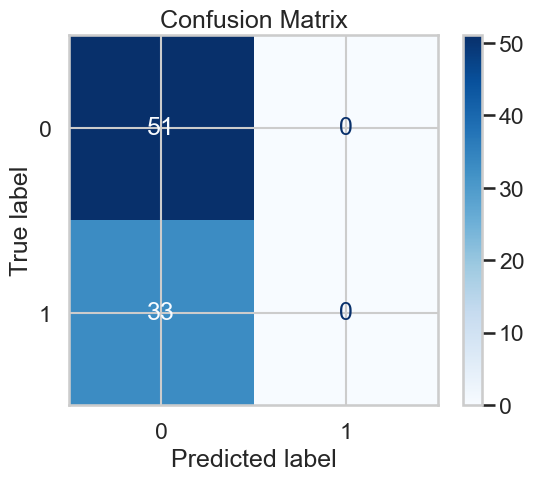

Classification Report:
               precision    recall  f1-score   support

         0.0       0.61      1.00      0.76        51
         1.0       0.00      0.00      0.00        33

    accuracy                           0.61        84
   macro avg       0.30      0.50      0.38        84
weighted avg       0.37      0.61      0.46        84


Confusion Matrix Explanation:
- True Positive (TP): The model correctly predicted the positive class.
- True Negative (TN): The model correctly predicted the negative class.
- False Positive (FP): The model incorrectly predicted the positive class.
- False Negative (FN): The model incorrectly predicted the negative class.



/opt/anaconda3/envs/pytorch_env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/pytorch_env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/pytorch_env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

In [30]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report

#########################################################################################
## TODO: Plot the confusion matrix and report the model accuracy on the test set
#########################################################################################

# Predict the labels for the test set
y_pred = svm_model.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# Generate a classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

# Explanation of each entry in the confusion matrix
print("""
Confusion Matrix Explanation:
- True Positive (TP): The model correctly predicted the positive class.
- True Negative (TN): The model correctly predicted the negative class.
- False Positive (FP): The model incorrectly predicted the positive class.
- False Negative (FN): The model incorrectly predicted the negative class.
""")

Add some outliers to the dataset, train an SVM and logistic regression model, and compare the results.

SVM Accuracy: 0.63
SVM Classification Report:
               precision    recall  f1-score   support

         0.0       0.63      1.00      0.77        73
         1.0       0.00      0.00      0.00        43

    accuracy                           0.63       116
   macro avg       0.31      0.50      0.39       116
weighted avg       0.40      0.63      0.49       116



/opt/anaconda3/envs/pytorch_env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/pytorch_env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/pytorch_env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

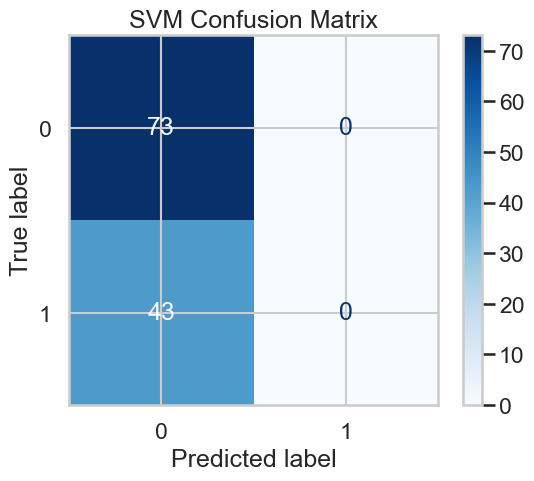

Logistic Regression Accuracy: 0.64
Logistic Regression Classification Report:
               precision    recall  f1-score   support

         0.0       0.63      1.00      0.78        73
         1.0       1.00      0.02      0.05        43

    accuracy                           0.64       116
   macro avg       0.82      0.51      0.41       116
weighted avg       0.77      0.64      0.51       116



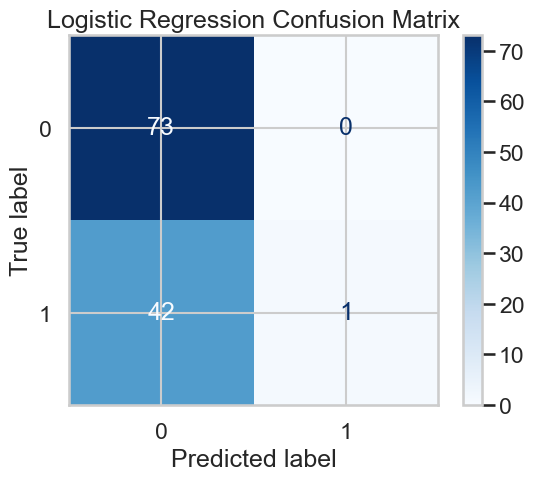

In [31]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report

# Assuming your dataset is loaded into a DataFrame called df
df_with_outliers = pd.read_csv("Liver_Disease.csv") 

# Add outliers to the dataset
def add_outliers(df, num_outliers=10, multiplier=10):
    df_outliers = df.copy()
    for col in df_outliers.select_dtypes(include=[float, int]).columns:
        outliers = np.random.choice(df_outliers.index, num_outliers, replace=False)
        df_outliers.loc[outliers, col] = df_outliers[col] * multiplier
    return df_outliers


# Preprocess the data
df_with_outliers = normalize_numerical_features(df_with_outliers)
df_with_outliers = encode_categorical_features(df_with_outliers)

# Define the features (X) and target (y)
X = df_with_outliers.drop(columns=['label'])  # Replace 'target' with the actual target column name
y = df_with_outliers['label']  # Replace 'target' with the actual target column name

X = X.dropna()
y = y[X.index]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# Train an SVM model
svm_model = SVC(C=best_params['C'], gamma=best_params['gamma'], kernel=best_params['kernel'])
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

# Train a Logistic Regression model
log_reg_model = LogisticRegression(max_iter=1000)
log_reg_model.fit(X_train, y_train)
y_pred_log_reg = log_reg_model.predict(X_test)

# Evaluate the SVM model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
cm_svm = confusion_matrix(y_test, y_pred_svm)
print(f"SVM Accuracy: {accuracy_svm:.2f}")
print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm))

# Plot the confusion matrix for SVM
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm)
disp_svm.plot(cmap=plt.cm.Blues)
plt.title('SVM Confusion Matrix')
plt.show()

# Evaluate the Logistic Regression model
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
cm_log_reg = confusion_matrix(y_test, y_pred_log_reg)
print(f"Logistic Regression Accuracy: {accuracy_log_reg:.2f}")
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_log_reg))

# Plot the confusion matrix for Logistic Regression
disp_log_reg = ConfusionMatrixDisplay(confusion_matrix=cm_log_reg)
disp_log_reg.plot(cmap=plt.cm.Blues)
plt.title('Logistic Regression Confusion Matrix')
plt.show()